In [758]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [759]:
df = pd.read_csv('/Users/Ayesha/Desktop/Aliyah/DAProject/data/catalog.csv')

In [760]:
df.columns

Index(['id', 'date', 'time', 'continent_code', 'country_name', 'country_code',
       'state/province', 'population', 'city/town', 'distance',
       'location_description', 'latitude', 'longitude', 'geolocation',
       'hazard_type', 'landslide_type', 'landslide_size', 'trigger',
       'storm_name', 'injuries', 'fatalities', 'source_name', 'source_link',
       'Address', 'Date_time', 'Minimum Temperature', 'Maximum Temperature',
       'Temperature', 'Dew Point', 'Relative Humidity', 'Heat Index',
       'Wind Speed', 'Wind Gust', 'Wind Direction', 'Wind Chill',
       'Precipitation', 'Precipitation Cover', 'Snow Depth', 'Visibility',
       'Cloud Cover', 'Sea Level Pressure', 'Weather Type', 'Latitude_rain',
       'Longitude', 'Resolved Address', 'Name, Info, Conditions',
       'Unnamed: 46'],
      dtype='object')

# Data Cleaning

### Heatmap to detect null values

id                        1686
date                       918
time                       159
continent_code               1
country_name                28
country_code                28
state/province             226
population                 994
city/town                 1028
distance                  1668
location_description        12
latitude                  1658
longitude                 1658
geolocation               1671
hazard_type                  1
landslide_type              14
landslide_size               7
trigger                     16
storm_name                  48
injuries                    15
fatalities                  36
source_name                548
source_link               1318
Address                   1666
Date_time                  897
Minimum Temperature        501
Maximum Temperature        506
Temperature                505
Dew Point                  512
Relative Humidity         1284
Heat Index                 227
Wind Speed                 247
Wind Gus

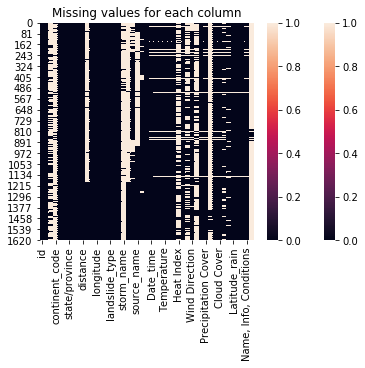

In [761]:
sns.heatmap(df.isnull())
print(df.nunique(axis=0));
plt.title("Missing values for each column")
sns.heatmap(df.isnull())
plt.show()

In [762]:
# Drop continent code
df.drop(['continent_code'], axis=1, inplace=True)

In [763]:
# Cleaning trigger column
df.trigger.replace(['unknown'],'Unknown', inplace=True)
df.trigger.replace(['Other'],'Unknown', inplace=True)
df.trigger.replace(['downpour'],'Downpour', inplace=True)
df.trigger = df.trigger.fillna('Unknown')
df.head

<bound method NDFrame.head of         id      date   time   country_name country_code  state/province  \
0       42   3/22/07    NaN  United States           US            Ohio   
1       56  04/06/07    NaN  United States           US    Pennsylvania   
2       59   4/14/07    NaN         Canada           CA          Quebec   
3       61   4/15/07    NaN  United States           US        Kentucky   
4       64   4/20/07    NaN  United States           US        Kentucky   
...    ...       ...    ...            ...          ...             ...   
1681  7535  12/07/15    NaN  United States           US  North Carolina   
1682  7537   2/22/16   0:00  United States           US   West Virginia   
1683  7539   2/23/16    NaN  United States           US   West Virginia   
1684  7540   2/26/16  21:06  United States           US   West Virginia   
1685  7541  03/02/16   8:00  United States           US         Vermont   

      population         city/town  distance location_description  ..

In [764]:
# Cleaning location description column
df.location_description.replace(['Other'],'Unknown', inplace=True)
df.location_description = df.location_description.fillna('Unknown')

In [765]:
# Cleaning time column
df.time.replace(['evening'],'Evening', inplace=True)
df.time = df.time.fillna('Unknown')

In [766]:
# Cleaning landslide type column
df.landslide_type.replace(['landslide'],'Landslide', inplace=True)
df.landslide_type.replace(['mudslide'],'Mudslide', inplace=True)
df.landslide_type.replace(['Unknown'],'Other', inplace=True)
df.landslide_type = df.landslide_type.fillna('Other')

In [767]:
# Cleaning landslide size column
df.landslide_size.replace(['large'],'Large', inplace=True)
df.landslide_type.replace(['medium'],'Medium', inplace=True)
df.landslide_size.replace(['small'],'Small', inplace=True)

In [768]:
# Cleaning source name and source type type column
df.source_name = df.source_name.fillna('Unknown')
df.source_link = df.source_link.fillna('Unknown')

In [769]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 46 columns):
id                        1686 non-null int64
date                      1686 non-null object
time                      1686 non-null object
country_name              1686 non-null object
country_code              1686 non-null object
state/province            1685 non-null object
population                1686 non-null int64
city/town                 1682 non-null object
distance                  1685 non-null float64
location_description      1686 non-null object
latitude                  1685 non-null float64
longitude                 1685 non-null float64
geolocation               1685 non-null object
hazard_type               1686 non-null object
landslide_type            1686 non-null object
landslide_size            1685 non-null object
trigger                   1686 non-null object
storm_name                131 non-null object
injuries                  512 non-null float64


,id,date,time,country_name,country_code,state/province,population,city/town,distance,location_description,...,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude_rain,Longitude,Resolved Address,"Name, Info, Conditions",Unnamed: 46
0,42,3/22/07,Unknown,United States,US,Ohio,17288,New Philadelphia,3.33522,Unknown,...,NaN,8.9,77.2,1019.5,"Mist, Rain, Light Rain",40.5175,-81.4305,"40.5175,-81.4305","Rain, Overcast",NaN
1,56,04/06/07,Unknown,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,Urban area,...,NaN,8.7,94.5,1012.1,Light Snow,40.4377,-79.916,"40.4377,-79.916",Overcast,NaN
2,59,4/14/07,Unknown,Canada,CA,Quebec,42786,Châteauguay,2.98682,Above river,...,NaN,NaN,0.0,1014.0,NaN,45.3226,-73.7771,"45.3226,-73.7771",Rain,NaN
3,61,4/15/07,Unknown,United States,US,Kentucky,6903,Pikeville,5.66542,Below road,...,NaN,4.5,80.0,1003.7,"Mist, Rain, Fog, Light Rain",37.4325,-82.4931,"37.4325,-82.4931","Rain, Overcast",NaN
4,64,4/20/07,Unknown,United States,US,Kentucky,6903,Pikeville,0.23715,Unknown,...,NaN,8.4,23.7,1020.9,Mist,37.4814,-82.5186,"37.4814,-82.5186",Clear,NaN


### Parsing Dates

In [770]:
print(df['date'].head())
df.dropna(subset = ['date'], inplace=True)
df.reset_index(drop=True, inplace=True)

0     3/22/07
1    04/06/07
2     4/14/07
3     4/15/07
4     4/20/07
Name: date, dtype: object


In [771]:
# Create a new column, date_parsed, with the parsed dates
df['date_parsed'] = pd.to_datetime(df['date'], format="%m/%d/%y")
print(df['date_parsed'].head())

0   2007-03-22
1   2007-04-06
2   2007-04-14
3   2007-04-15
4   2007-04-20
Name: date_parsed, dtype: datetime64[ns]


In [772]:
# Add year and month colums
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [773]:
# Add abbreviated months
myMonths = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['MonthAbb'] = df['month']
for i in range(len(df['month'])):
    df['MonthAbb'][i] = myMonths[int(df['month'][i]-1)]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [774]:
df['month_landslides'] = df['date_parsed'].dt.month
df.month_landslides.head()

0    3
1    4
2    4
3    4
4    4
Name: month_landslides, dtype: int64

In [775]:
date_landslides = df['date_parsed'].dt.day
date_landslides.head()

0    22
1     6
2    14
3    15
4    20
Name: date_parsed, dtype: int64

In [776]:
df["year"]=year_landslides = df['date_parsed'].dt.year
year_landslides = df['date_parsed'].dt.year
year_landslides.head()

0    2007
1    2007
2    2007
3    2007
4    2007
Name: date_parsed, dtype: int64

In [777]:
grouped_df = df.groupby(["month_landslides", "year"])
grouped_df.head()

,id,date,time,country_name,country_code,state/province,population,city/town,distance,location_description,...,Latitude_rain,Longitude,Resolved Address,"Name, Info, Conditions",Unnamed: 46,date_parsed,year,month,MonthAbb,month_landslides
0,42,3/22/07,Unknown,United States,US,Ohio,17288,New Philadelphia,3.33522,Unknown,...,40.5175,-81.4305,"40.5175,-81.4305","Rain, Overcast",NaN,2007-03-22,2007,3,March,3
1,56,04/06/07,Unknown,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,Urban area,...,40.4377,-79.916,"40.4377,-79.916",Overcast,NaN,2007-04-06,2007,4,April,4
2,59,4/14/07,Unknown,Canada,CA,Quebec,42786,Châteauguay,2.98682,Above river,...,45.3226,-73.7771,"45.3226,-73.7771",Rain,NaN,2007-04-14,2007,4,April,4
3,61,4/15/07,Unknown,United States,US,Kentucky,6903,Pikeville,5.66542,Below road,...,37.4325,-82.4931,"37.4325,-82.4931","Rain, Overcast",NaN,2007-04-15,2007,4,April,4
4,64,4/20/07,Unknown,United States,US,Kentucky,6903,Pikeville,0.23715,Unknown,...,37.4814,-82.5186,"37.4814,-82.5186",Clear,NaN,2007-04-20,2007,4,April,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,7520,2/24/16,Night,United States,US,Pennsylvania,5951,Crafton,1.45894,Above road,...,40.4377,-80.083,"40.4377,-80.083","Rain, Overcast",NaN,2016-02-24,2016,2,February,2
1669,7521,2/15/16,Morning,United States,US,Colorado,9614,Glenwood Springs,13.85194,Above road,...,39.5926,-107.1799,"39.5926,-107.1799","Rain, Overcast",NaN,2016-02-15,2016,2,February,2
1670,7522,2/24/16,Unknown,United States,US,Virginia,1128,Pembroke,3.21144,Above road,...,37.3444,-80.6203,"37.3444,-80.6203","Rain, Overcast",NaN,2016-02-24,2016,2,February,2
1673,7527,1/28/16,9:45,United States,US,North Carolina,1241,Blowing Rock,4.20387,Above road,...,36.1062,-81.6475,"36.1062,-81.6475",Clear,NaN,2016-01-28,2016,1,January,1


In [778]:
count=grouped_df.id.nunique()
count.head(15)

month_landslides  year
1                 2008     5
                  2009     2
                  2010    16
                  2011     8
                  2012     4
                  2013    15
                  2014     9
                  2015     4
                  2016     2
2                 2008     3
                  2009     1
                  2010    14
                  2011     6
                  2012     1
                  2013     1
Name: id, dtype: int64

In [779]:
# Creating 2015 dataset
df2015 = df[df['year'] == 2015]
df2015.dropna(subset = ['fatalities', 'injuries'], inplace=True)
df2015.reset_index(drop=True, inplace=True)
df2015

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,date,time,country_name,country_code,state/province,population,city/town,distance,location_description,...,Latitude_rain,Longitude,Resolved Address,"Name, Info, Conditions",Unnamed: 46,date_parsed,year,month,MonthAbb,month_landslides
0,6617,01/03/15,0:34,United States,US,Idaho,1081,Challis,0.36084,Above road,...,44.5072,-114.2346,"44.5072,-114.2346",Overcast,NaN,2015-01-03,2015,1,January,1
1,6731,1/21/15,Unknown,United States,US,Idaho,1081,Joseph,44.08725,Above road,...,45.2091,-116.7067,"45.2091,-116.7067",Clear,NaN,2015-01-21,2015,1,January,1
2,6735,1/28/15,23:00,Costa Rica,CR,San José,34877,San Isidro,22.32368,Below road,...,9.7962,-83.9498,"9.7962,-83.9498",Partially cloudy,NaN,2015-01-28,2015,1,January,1
3,6738,02/01/15,10:05,United States,US,California,14236,Alpine,1.38372,Urban area,...,32.8364,-116.7692,"32.8364,-116.7692",Clear,NaN,2015-02-01,2015,2,February,2
4,6747,02/06/15,Afternoon,Costa Rica,CR,San José,0,Dulce Nombre de Jesus,8.39161,Above road,...,10.0757,-83.9822,"10.0757,-83.9822",Partially cloudy,NaN,2015-02-06,2015,2,February,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,7516,10/21/15,Unknown,Mexico,MX,Chiapas,18608,Emiliano Zapata,4.68443,Below road,...,17.7055,-91.7416,"17.7055,-91.7416",Overcast,NaN,2015-10-21,2015,10,October,10
264,7517,09/12/15,Unknown,Mexico,MX,Chiapas,6089,Tila,1.73469,Below road,...,17.3112,-92.4393,"17.3112,-92.4393","Rain, Partially cloudy",NaN,2015-09-12,2015,9,September,9
265,7518,10/15/15,Unknown,Mexico,MX,Tabasco,32415,Tenosique de Pino Suárez,15.22260,Below road,...,17.4054,-91.2988,"17.4054,-91.2988",Partially cloudy,NaN,2015-10-15,2015,10,October,10
266,7534,11/29/15,Unknown,United States,US,North Carolina,1646,Tryon,7.69666,Above road,...,35.2207,-82.3216,"35.2207,-82.3216","Rain, Partially cloudy",NaN,2015-11-29,2015,11,November,11


In [780]:
df2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 51 columns):
id                        268 non-null int64
date                      268 non-null object
time                      268 non-null object
country_name              268 non-null object
country_code              268 non-null object
state/province            268 non-null object
population                268 non-null int64
city/town                 266 non-null object
distance                  268 non-null float64
location_description      268 non-null object
latitude                  268 non-null float64
longitude                 268 non-null float64
geolocation               268 non-null object
hazard_type               268 non-null object
landslide_type            268 non-null object
landslide_size            267 non-null object
trigger                   268 non-null object
storm_name                3 non-null object
injuries                  268 non-null float64
fatalities           

In [781]:
# Creating USA dataset
dfUSA = df[df['country_name'] == 'United States']
dfUSA.dropna(subset = ['fatalities', 'injuries'], inplace=True)
dfUSA.reset_index(drop=True, inplace=True)
dfUSA =  dfUSA.sort_values(by=['year'])  # sort by year
dfUSA

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,date,time,country_name,country_code,state/province,population,city/town,distance,location_description,...,Latitude_rain,Longitude,Resolved Address,"Name, Info, Conditions",Unnamed: 46,date_parsed,year,month,MonthAbb,month_landslides
251,7399,4/13/07,Unknown,United States,US,Pennsylvania,3165,Homestead,3.74490,Unknown,...,40.4267,-79.9468,"40.4267,-79.9468",Overcast,NaN,2007-04-13,2007,4,April,4
75,6253,06/01/07,Unknown,United States,US,Colorado,1864,Granby,5.53226,Unknown,...,40.0929,-105.8752,"40.0929,-105.8752",Partially cloudy,NaN,2007-06-01,2007,6,June,6
111,6585,05/11/08,5:45,United States,US,Maryland,19096,Camp Springs,1.87540,Above river,...,38.8162,-76.9216,"38.8162,-76.9216","Rain, Partially cloudy",NaN,2008-05-11,2008,5,May,5
79,6303,06/11/09,Unknown,United States,US,Utah,48174,Logan,1.79637,Above river,...,41.7385,-111.8132,"41.7385,-111.8132","Rain, Overcast",NaN,2009-06-11,2009,6,June,6
0,2734,11/17/10,10:30:00,United States,US,Pennsylvania,2763,Manchester,5.03527,Above road,...,40.0988,-76.7763,"40.0988,-76.7763","Rain, Partially cloudy",NaN,2010-11-17,2010,11,November,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,7521,2/15/16,Morning,United States,US,Colorado,9614,Glenwood Springs,13.85194,Above road,...,39.5926,-107.1799,"39.5926,-107.1799","Rain, Overcast",NaN,2016-02-15,2016,2,February,2
253,7519,2/24/16,Unknown,United States,US,Virginia,1371,Springville,8.58443,Above road,...,37.2699,-81.3724,"37.2699,-81.3724","Rain, Overcast",NaN,2016-02-24,2016,2,February,2
269,7540,2/26/16,21:06,United States,US,West Virginia,1048,Athens,12.00678,Above road,...,37.5011,-81.1093,"37.5011,-81.1093","Rain, Overcast",NaN,2016-02-26,2016,2,February,2
260,7529,2/27/16,Unknown,United States,US,Idaho,939,Cascade,22.78728,Above road,...,44.3127,-116.076,"44.3127,-116.07600000000001","Rain, Overcast",NaN,2016-02-27,2016,2,February,2


# Data Visualization

### What size of landslides are most likely to occur

Text(0.5, 1.0, 'Lanslide Size Occurence')

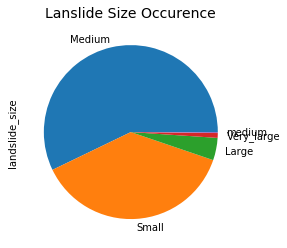

In [782]:
df.landslide_size.value_counts().plot(kind='pie')
plt.title('Lanslide Size Occurence', fontsize=14)

#### Inference:
From the above chart we can infer that medium sized landslides are most likely to occur and very large landslides are least likely to occur.

### Occurrence of different types of triggers of landslides 

Text(0.5, 1.0, 'Occurrence of different types of triggers')

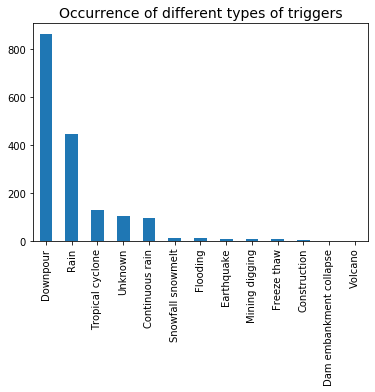

In [783]:
df.trigger.value_counts().plot(kind='bar')
plt.title('Occurrence of different types of triggers', fontsize=14)

#### Infrence:
From the above plot we can infer that landslides are most likely to be caused by downpour followed by rain, and it is least likely to be caused by a volcano and embarkment collapse.

### Number of fatalities and injuries that occurred vs the distance travelled by the landslide

Text(0.5, 1.0, 'Fatalities vs Distance travelled by landslide')

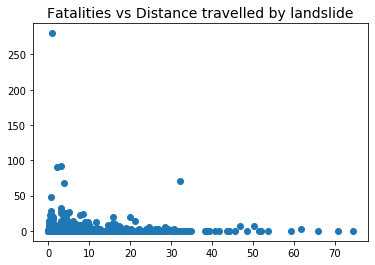

In [784]:
plt.title
plt.scatter(x = df['distance'], y = df['fatalities'])
plt.title('Fatalities vs Distance travelled by landslide', fontsize=14)

Text(0.5, 1.0, 'Injuries vs Distance travelled by the landslide')

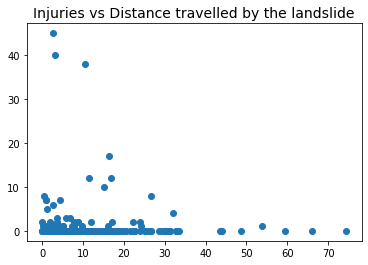

In [785]:
plt.scatter(x = df['distance'], y = df['injuries'])
plt.title('Injuries vs Distance travelled by the landslide', fontsize=14)

#### Inference:
From the above plots we can infer that landslides that happen over a shorter distance are more fatal and injurious than the ones that have been recorded over longer distances.

### Distribution of landslide per type and country

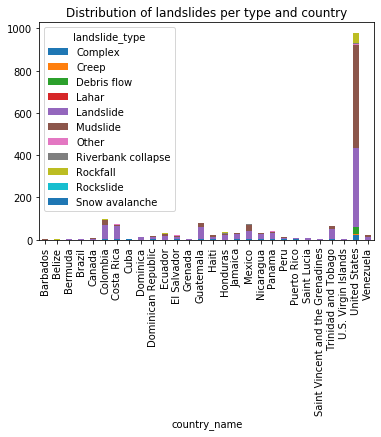

In [786]:
df.groupby(['country_name', 'landslide_type']).size().unstack().plot(kind='bar', stacked=True, title = 'Distribution of landslides per type and country')

#### Inference:
From the above plot we can infer:
* Landslides most commonly occur in the United States.
* Landslides and mudslides are the types of landslides that are most likely to occur. 


### Distribution of landslide type

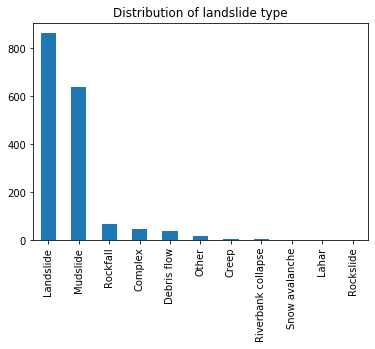

In [787]:
df.landslide_type.value_counts().plot(kind='bar', title = 'Distribution of landslide type')

#### Inference:
From the above plot we can infer that landslides are the most common type of landslide to occur followed by mudslides.

### Distribution of landslides per trigger per year

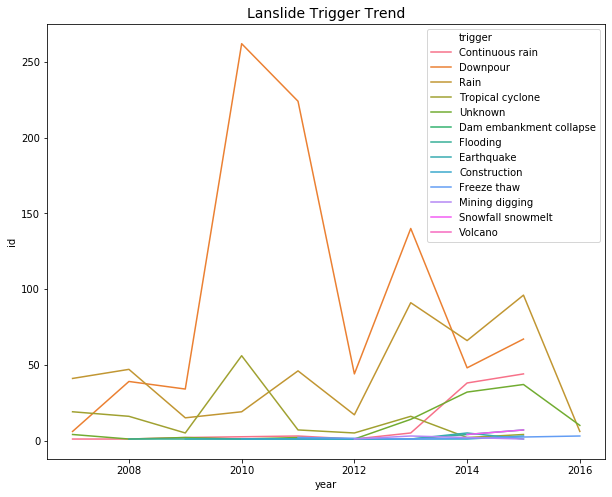

In [788]:
df_sort =  df.sort_values(by=['year'])  # sort by year
plt.figure(figsize=(10,8))
plt.title('Lanslide Trigger Trend', fontsize=14)
grouped = df_sort.groupby(['year', 'trigger']).count().reset_index()
sns.lineplot(data = grouped, x = 'year', y = 'id', hue = 'trigger')

#### Inference
From the above plot we can infer that landslides are most commonly triggered by downpour followed by rain.

### To check if there is a seasonality of occurrence of landslides

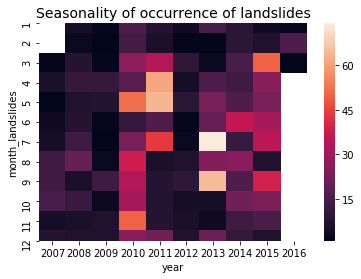

In [789]:
jb_count = count.loc[:,:].reset_index().pivot(index='month_landslides', columns='year', values='id')
sns.heatmap(jb_count)
plt.title('Seasonality of occurrence of landslides', fontsize=14)
plt.show()

#### Inference
There is no clear seasonality that can be visualized in the heatmap. However, in the boxplots there is a seasonality where in the beginning and end of the year there are less landslides than during the mid of the year.

In [790]:
# To analyze the region of occurrences of various types of landslides and the number of fatalities they caused ???????????????????????????


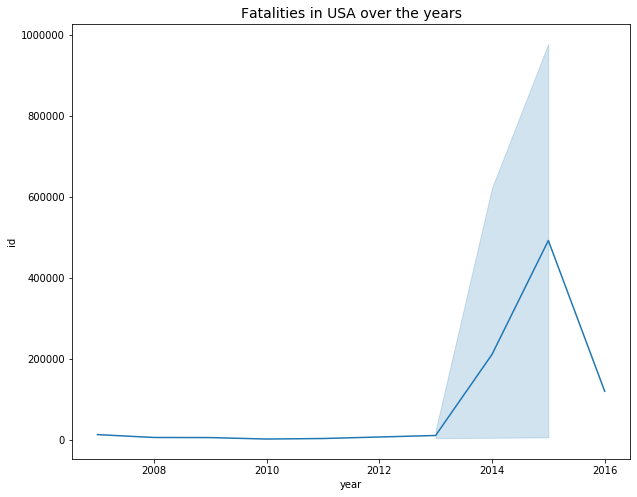

In [791]:
# Fatalities of landslides in USA over the years
plt.figure(figsize=(10,8))
plt.title('Fatalities in USA over the years', fontsize=14)
grouped = dfUSA.groupby(['year', 'fatalities']).sum().reset_index()
sns.lineplot(data = grouped, x = 'year', y = 'id')

In [792]:
import plotly.express as px
import pandas as pd


fig = px.scatter_geo(lat=df['latitude'],lon=df['longitude'], hover_name=df['id'], color=df["landslide_type"])
fig.update_layout(title = 'Different Landslide types on World map', title_x=0.5)
fig.show()

#### Inference: 
From the above plot we can infer:
•	Most common landslide types are landslides and mudslides.
•	Landslides are most likely to occur in regions closer to waterbodies.


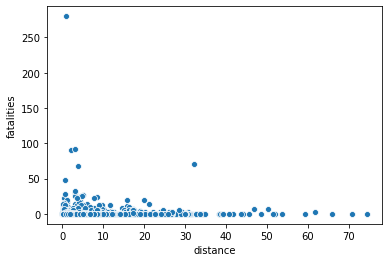

In [793]:
import seaborn as sns
sns.scatterplot(x="distance", y="fatalities", data=df)

In [794]:
#models
df = pd.read_csv('/Users/Ayesha/Desktop/Aliyah/DAProject/data/catalog.csv')

In [795]:
df.landslide_type.replace(['landslide'],'Landslide', inplace=True)
df.landslide_type.replace(['mudslide'],'Mudslide', inplace=True)
df.landslide_type.replace(['Unknown'],'Other', inplace=True)
df.landslide_size.replace(['medium'],'Medium', inplace=True)
df.landslide_size.replace(['small'],'Small', inplace=True)
df.landslide_size.replace(['large'],'Large', inplace=True)
df.landslide_size = df.landslide_size.fillna('Other')
df.landslide_type = df.landslide_type.fillna('Other')

In [796]:
df["landslide_type"].unique()
df["landslide_size"].unique()

array(['Small', 'Large', 'Medium', 'Very_large', 'Other'], dtype=object)

In [797]:
Temp_dict= { 'Small' : 1, 'Medium': 2, 'Large': 3, 'Very_large': 4, 'Other':5}
df["size_ordinal"]=df.landslide_size.map(Temp_dict)

Temp_dict2= { 'Landslide' : 1, 'Riverbank collapse': 2, 'Mudslide': 3, 'Complex': 4, 'Debris flow': 5, 'Rockfall': 6, 'Lahar': 7, 'Creep': 8, 'Snow avalanche': 9, 'Rockslide': 10, 'Other': 11}
df["type_ordinal"]=df.landslide_type.map(Temp_dict2)

In [798]:
df["distance"]=df["distance"].fillna(df["distance"].mean())
df["population"]=df["population"].fillna(df["population"].mean())
df['fatalities']=df['fatalities'].fillna(df.groupby('landslide_size')['fatalities'].transform('mean')).round()
df.dropna(subset = ['latitude'], inplace=True)
df.dropna(subset = ['longitude'], inplace=True)
df.isnull().sum()
#df["fatalities"]=df["fatalities"].("landslide_size")fillna(df["fatalities"].mean())

id                           0
date                         0
time                      1062
continent_code            1521
country_name                 0
country_code                 0
state/province               1
population                   0
city/town                    4
distance                     0
location_description      1138
latitude                     0
longitude                    0
geolocation                  0
hazard_type                  0
landslide_type               0
landslide_size               0
trigger                      2
storm_name                1554
injuries                  1173
fatalities                   0
source_name                817
source_link                100
Address                      6
Date_time                   62
Minimum Temperature         76
Maximum Temperature         76
Temperature                 76
Dew Point                   80
Relative Humidity           80
Heat Index                1077
Wind Speed                  81
Wind Gus

In [799]:
from sklearn.preprocessing import MinMaxScaler
col = ['population', 'fatalities', 'size_ordinal', 'distance','type_ordinal']
data = df[col]
s = data.values.astype(float)
min_max_scaler = MinMaxScaler(feature_range=(0,1))
s_scaled = min_max_scaler.fit_transform(s)
df_normalized = pd.DataFrame(s_scaled, columns=col,index=df.index)
df_normalized = df_normalized.rename(columns={'population':'n_pop', 'fatalities':'n_fatalities', 'size_ordinal':'n_size', 'distance':'n_dist','type_ordinal':'n_type'})
df = pd.concat([df, df_normalized],axis=1)
df

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,Resolved Address,"Name, Info, Conditions",Unnamed: 46,size_ordinal,type_ordinal,n_pop,n_fatalities,n_size,n_dist,n_type
0,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"40.5175,-81.4305","Rain, Overcast",NaN,1,1,0.001406,0.0,0.0,0.044791,0.0
1,56,04/06/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"40.4377,-79.916",Overcast,NaN,1,1,0.001296,0.0,0.0,0.039212,0.0
2,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"45.3226,-73.7771",Rain,NaN,1,2,0.003480,0.0,0.0,0.040112,0.1
3,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"37.4325,-82.4931","Rain, Overcast",NaN,1,1,0.000561,0.0,0.0,0.076085,0.0
4,64,4/20/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,0.23715,...,"37.4814,-82.5186",Clear,NaN,1,1,0.000561,0.0,0.0,0.003184,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,7535,12/07/15,NaN,NaN,United States,US,North Carolina,1646,Tryon,7.80866,...,"35.2219,-82.3226",Clear,NaN,1,6,0.000134,0.0,0.0,0.104869,0.5
1682,7537,2/22/16,0:00,NaN,United States,US,West Virginia,51400,Charleston,6.84721,...,"38.3987,-81.5848",Overcast,NaN,1,3,0.004181,0.0,0.0,0.091957,0.2
1683,7539,2/23/16,NaN,NaN,United States,US,West Virginia,2406,Welch,14.19735,...,"37.4096,-81.4268","Rain, Overcast",NaN,1,1,0.000196,0.0,0.0,0.190668,0.0
1684,7540,2/26/16,21:06,NaN,United States,US,West Virginia,1048,Athens,12.00678,...,"37.5011,-81.1093","Rain, Overcast",NaN,1,6,0.000085,0.0,0.0,0.161249,0.5


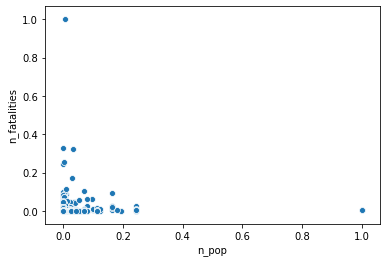

In [800]:
sns.scatterplot(x="n_pop", y="n_fatalities", data=df)

In [855]:
df200=df
df200['Precipitation'].fillna(value=df200['Precipitation'].mean(), inplace=True)
df200['Wind Speed'].fillna(value=df200['Wind Speed'].mean(), inplace=True)
df200['Precipitation Cover'].fillna(value=df200['Precipitation Cover'].mean(), inplace=True)
df200['Relative Humidity'].fillna(value=df200['Relative Humidity'].mean(), inplace=True)
df200['Cloud Cover'].fillna(value=df200['Cloud Cover'].mean(), inplace=True)
df200['Snow Depth'].fillna(value=df200['Snow Depth'].mean(), inplace=True)
df200['Heat Index'].fillna(value=df200['Heat Index'].mean(), inplace=True)
df200['Dew Point'].fillna(value=df200['Dew Point'].mean(), inplace=True)
df200['Wind Direction'].fillna(value=df200['Wind Direction'].mean(), inplace=True)
df200['Temperature']=df['Temperature'].fillna(df.groupby('country_name')['Temperature'].transform('mean'))
df200['Sea Level Pressure'].fillna(value=df200['Sea Level Pressure'].mean(), inplace=True)
df200['Precipitation Cover'].isnull().sum()

0

In [892]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df200[['Precipitation Cover', 'Dew Point', 'Temperature', 'Wind Direction','size_ordinal','fatalities']].values
y = df200['Wind Speed'].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=1)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [894]:
predicted = regressor.predict(x_test)
#predicted=np.ceil(predicted)
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})
df2.head(50)

,Actual,Predicted
0,16.800000,14.567371
1,13.900000,12.347128
2,9.200000,13.699692
3,9.700000,14.578799
4,13.700000,14.573677
5,15.900000,14.383243
6,18.100000,14.649838
7,14.400000,14.705041
8,9.200000,11.376449
9,9.900000,12.893723


In [896]:
import math
import sklearn.metrics as metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 3.648848454495116
Mean Squared Error: 21.968209474918392
Root Mean Squared Error: 4.6870256533241195


In [897]:
#correlation
df200[df200.columns[1:]].corr()['distance'][:]

population            -0.077110
distance               1.000000
latitude               0.055963
longitude             -0.249848
injuries               0.013172
fatalities            -0.030678
Minimum Temperature   -0.016200
Maximum Temperature    0.026469
Temperature            0.005789
Dew Point             -0.052732
Relative Humidity     -0.134511
Heat Index            -0.081657
Wind Speed            -0.016266
Wind Gust              0.019193
Wind Direction        -0.011170
Wind Chill             0.071443
Precipitation         -0.108782
Precipitation Cover   -0.044109
Snow Depth             0.067556
Visibility             0.002208
Cloud Cover           -0.156001
Sea Level Pressure     0.058580
Latitude_rain          0.053768
size_ordinal           0.060359
type_ordinal           0.051533
n_pop                 -0.077110
n_fatalities          -0.030678
n_size                 0.060359
n_dist                 1.000000
n_type                 0.051533
Name: distance, dtype: float64

In [898]:
#dew point, temperature, wind direction, precipitation cover

In [899]:
df200['Dew Point'].fillna(value=df200['Dew Point'].mean(), inplace=True)
df200['Temperature'].fillna(value=df200['Temperature'].mean(), inplace=True)
df200['Wind Direction'].fillna(value=df200['Wind Direction'].mean(), inplace=True)

In [900]:
#knn
#mention how we chose k as sqrt(n)/2
#manhattan works better


x = df200[['latitude','longitude','Precipitation Cover', 'Dew Point', 'Temperature', 'Wind Direction']].values
y = df200['size_ordinal'].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=1)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 20, metric = 'manhattan', p = 1)
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=20, p=1)

In [901]:
df200.shape

(1685, 54)

In [902]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [903]:
print(ac*100)

69.23076923076923


In [904]:
from sklearn.naive_bayes import GaussianNB

x = df200[['latitude','longitude','Precipitation Cover', 'Dew Point', 'Temperature', 'Wind Direction']].values
y = df200['size_ordinal'].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=1)

classifier = GaussianNB()
classifier.fit(x_train, y_train)

y_pred  =  classifier.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [905]:
print(ac*100)

61.53846153846154


In [906]:
print(cm)

[[46 25  0  0]
 [32 58  0  0]
 [ 1  5  0  0]
 [ 0  2  0  0]]


In [907]:
df['size_ordinal'].unique()

array([1, 3, 2, 4, 5])

In [908]:
from sklearn.neural_network import MLPClassifier

x = df200[['latitude','longitude','Precipitation Cover', 'Dew Point','Temperature']].values
y = df200['size_ordinal'].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(16,16), activation='identity', solver='adam', max_iter=500)
mlp.fit(x_train,y_train)

predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

In [909]:
ac = accuracy_score(y_test,predict_test)

In [910]:
print(ac*100)

60.23738872403561


In [911]:
 #Supported activations are ['identity', 'logistic', 'relu', 'softmax', 'tanh'].

In [912]:
from sklearn.ensemble import RandomForestClassifier

x = df200[['Precipitation Cover', 'Dew Point','Temperature', 'Wind Direction']].values
y = df200['size_ordinal'].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [913]:
ac = accuracy_score(y_test,y_pred)
print(ac*100)

56.97329376854599


In [914]:
df200.columns

Index(['id', 'date', 'time', 'continent_code', 'country_name', 'country_code',
       'state/province', 'population', 'city/town', 'distance',
       'location_description', 'latitude', 'longitude', 'geolocation',
       'hazard_type', 'landslide_type', 'landslide_size', 'trigger',
       'storm_name', 'injuries', 'fatalities', 'source_name', 'source_link',
       'Address', 'Date_time', 'Minimum Temperature', 'Maximum Temperature',
       'Temperature', 'Dew Point', 'Relative Humidity', 'Heat Index',
       'Wind Speed', 'Wind Gust', 'Wind Direction', 'Wind Chill',
       'Precipitation', 'Precipitation Cover', 'Snow Depth', 'Visibility',
       'Cloud Cover', 'Sea Level Pressure', 'Weather Type', 'Latitude_rain',
       'Longitude', 'Resolved Address', 'Name, Info, Conditions',
       'Unnamed: 46', 'size_ordinal', 'type_ordinal', 'n_pop', 'n_fatalities',
       'n_size', 'n_dist', 'n_type'],
      dtype='object')

In [ ]:
from sklearn import svm


x = df200[['latitude','longitude','Precipitation Cover','Temperature']].values
y = df200['size_ordinal'].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=1)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))